# A simple implementation of an earthquake hazard to be used within CLIMADA

Reads a file with earthquake epicentres (fetch the file from www.isc.ac.uk/iscgem/download.php)
Converts epicentres (Richter magnitude and depth) into modified mercally (MMI) intensity at centroids

Inspired by https://github.com/davidnbresch/climada_module_earthquake_volcano/blob/master/code/eq_isc_gem_read.m etc. Earthquake attenuation formula etc. from https://doi.org/10.1201/9781482271645 

In [1]:
import pandas as pd
from climada import CONFIG
from pathlib import Path

isc_gem_cat_file='/Users/ckropf/Documents/Climada/climada_petals/climada_petals/hazard/test/data/isc-gem-cat.csv'
isc_gem_cat = pd.read_csv(isc_gem_cat_file, delimiter=' , ', comment='#', header=None, engine='python')
isc_gem_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,,16957832


In [2]:
# the file's first rows are comment rows, the last of them is the 'header' row (containing the column names),
# hence some parsing is required
with open(isc_gem_cat_file) as fl:
    for ln in fl.readlines():
        if ln[0] != '#': break
        pr = ln
isc_gem_cat.columns = [x.strip() for x in pr[1:].split(',')]
isc_gem_cat.head()

,date,lat,lon,smajax,sminax,strike,q,depth,unc,q,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,,16957832


<AxesSubplot:title={'center':'ISC GEM epicentres'}, xlabel='lon', ylabel='lat'>

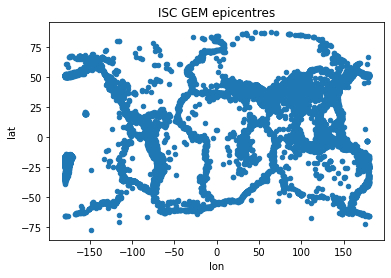

In [3]:
isc_gem_cat.plot.scatter(x='lon',y='lat',title='ISC GEM epicentres')

2022-06-16 15:58:43,692 - climada.hazard.centroids.centr - INFO - Reading /Users/ckropf/Documents/Climada/climada_petals/climada_petals/hazard/test/data/NZL_NewZealand_centroids.mat
2022-06-16 15:58:43,720 - climada.util.plot - WARNING - Error parsing coordinate system 'EPSG:4326'. Using projection PlateCarree in plot.


<GeoAxesSubplot:>

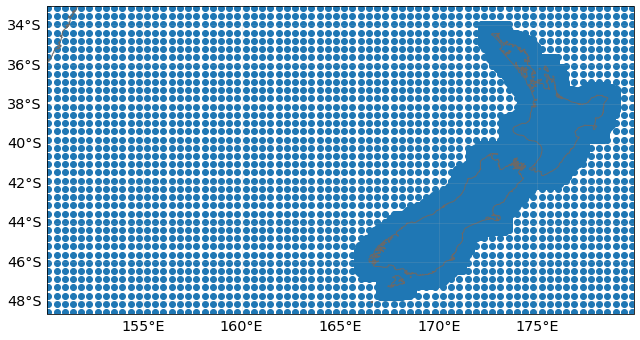

In [4]:
from climada.hazard import Centroids
centroids_file='/Users/ckropf/Documents/Climada/climada_petals/climada_petals/hazard/test/data/NZL_NewZealand_centroids.mat'
centroids=Centroids.from_mat(centroids_file)
centroids.plot()

In [5]:
from climada_petals.hazard import Earthquake

In [ ]:
quake = Earthquake.from_Mw_depth(isc_gem_cat, centroids)

2022-06-16 16:00:08,946 - climada.util.plot - WARNING - Error parsing coordinate system 'EPSG:4326'. Using projection PlateCarree in plot.


/Users/ckropf/opt/anaconda3/envs/climada_310/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


<GeoAxesSubplot:title={'center':' max intensity at each point'}>

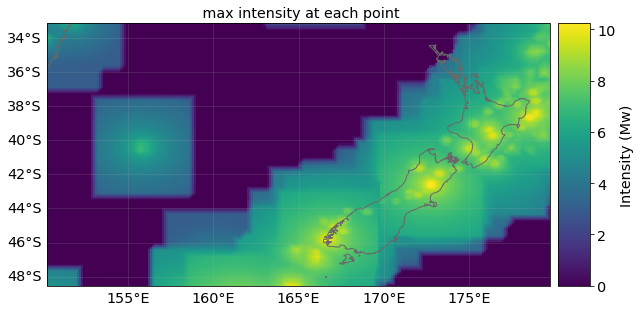

In [7]:
quake.plot_intensity(0);